In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the data 

In [20]:
df = pd.read_csv("Datasets\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [28]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

- 9134 observations
- 24 features 
- There are no missing values 

In [22]:
# Check for mixed data types within features 
def check_data_types(dataframe):
    results = []

    for column in df.columns:
        unique_types = {type(val).__name__ for val in df[column].dropna()}
        mixed_types = len(unique_types) > 1
        results.append({
            'FeatureName': column,
            'MixedDataTypes': mixed_types,
            'ObservedDataTypes': ', '.join(sorted(unique_types))
        })

    return pd.DataFrame(results)

print(check_data_types(df))

                      FeatureName  MixedDataTypes ObservedDataTypes
0                        Customer           False               str
1                           State           False               str
2         Customer Lifetime Value           False             float
3                        Response           False               str
4                        Coverage           False               str
5                       Education           False               str
6               Effective To Date           False               str
7                EmploymentStatus           False               str
8                          Gender           False               str
9                          Income           False               int
10                  Location Code           False               str
11                 Marital Status           False               str
12           Monthly Premium Auto           False               int
13        Months Since Last Claim           Fals

None of thea features have mixed datatypes.

### Numeric features

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


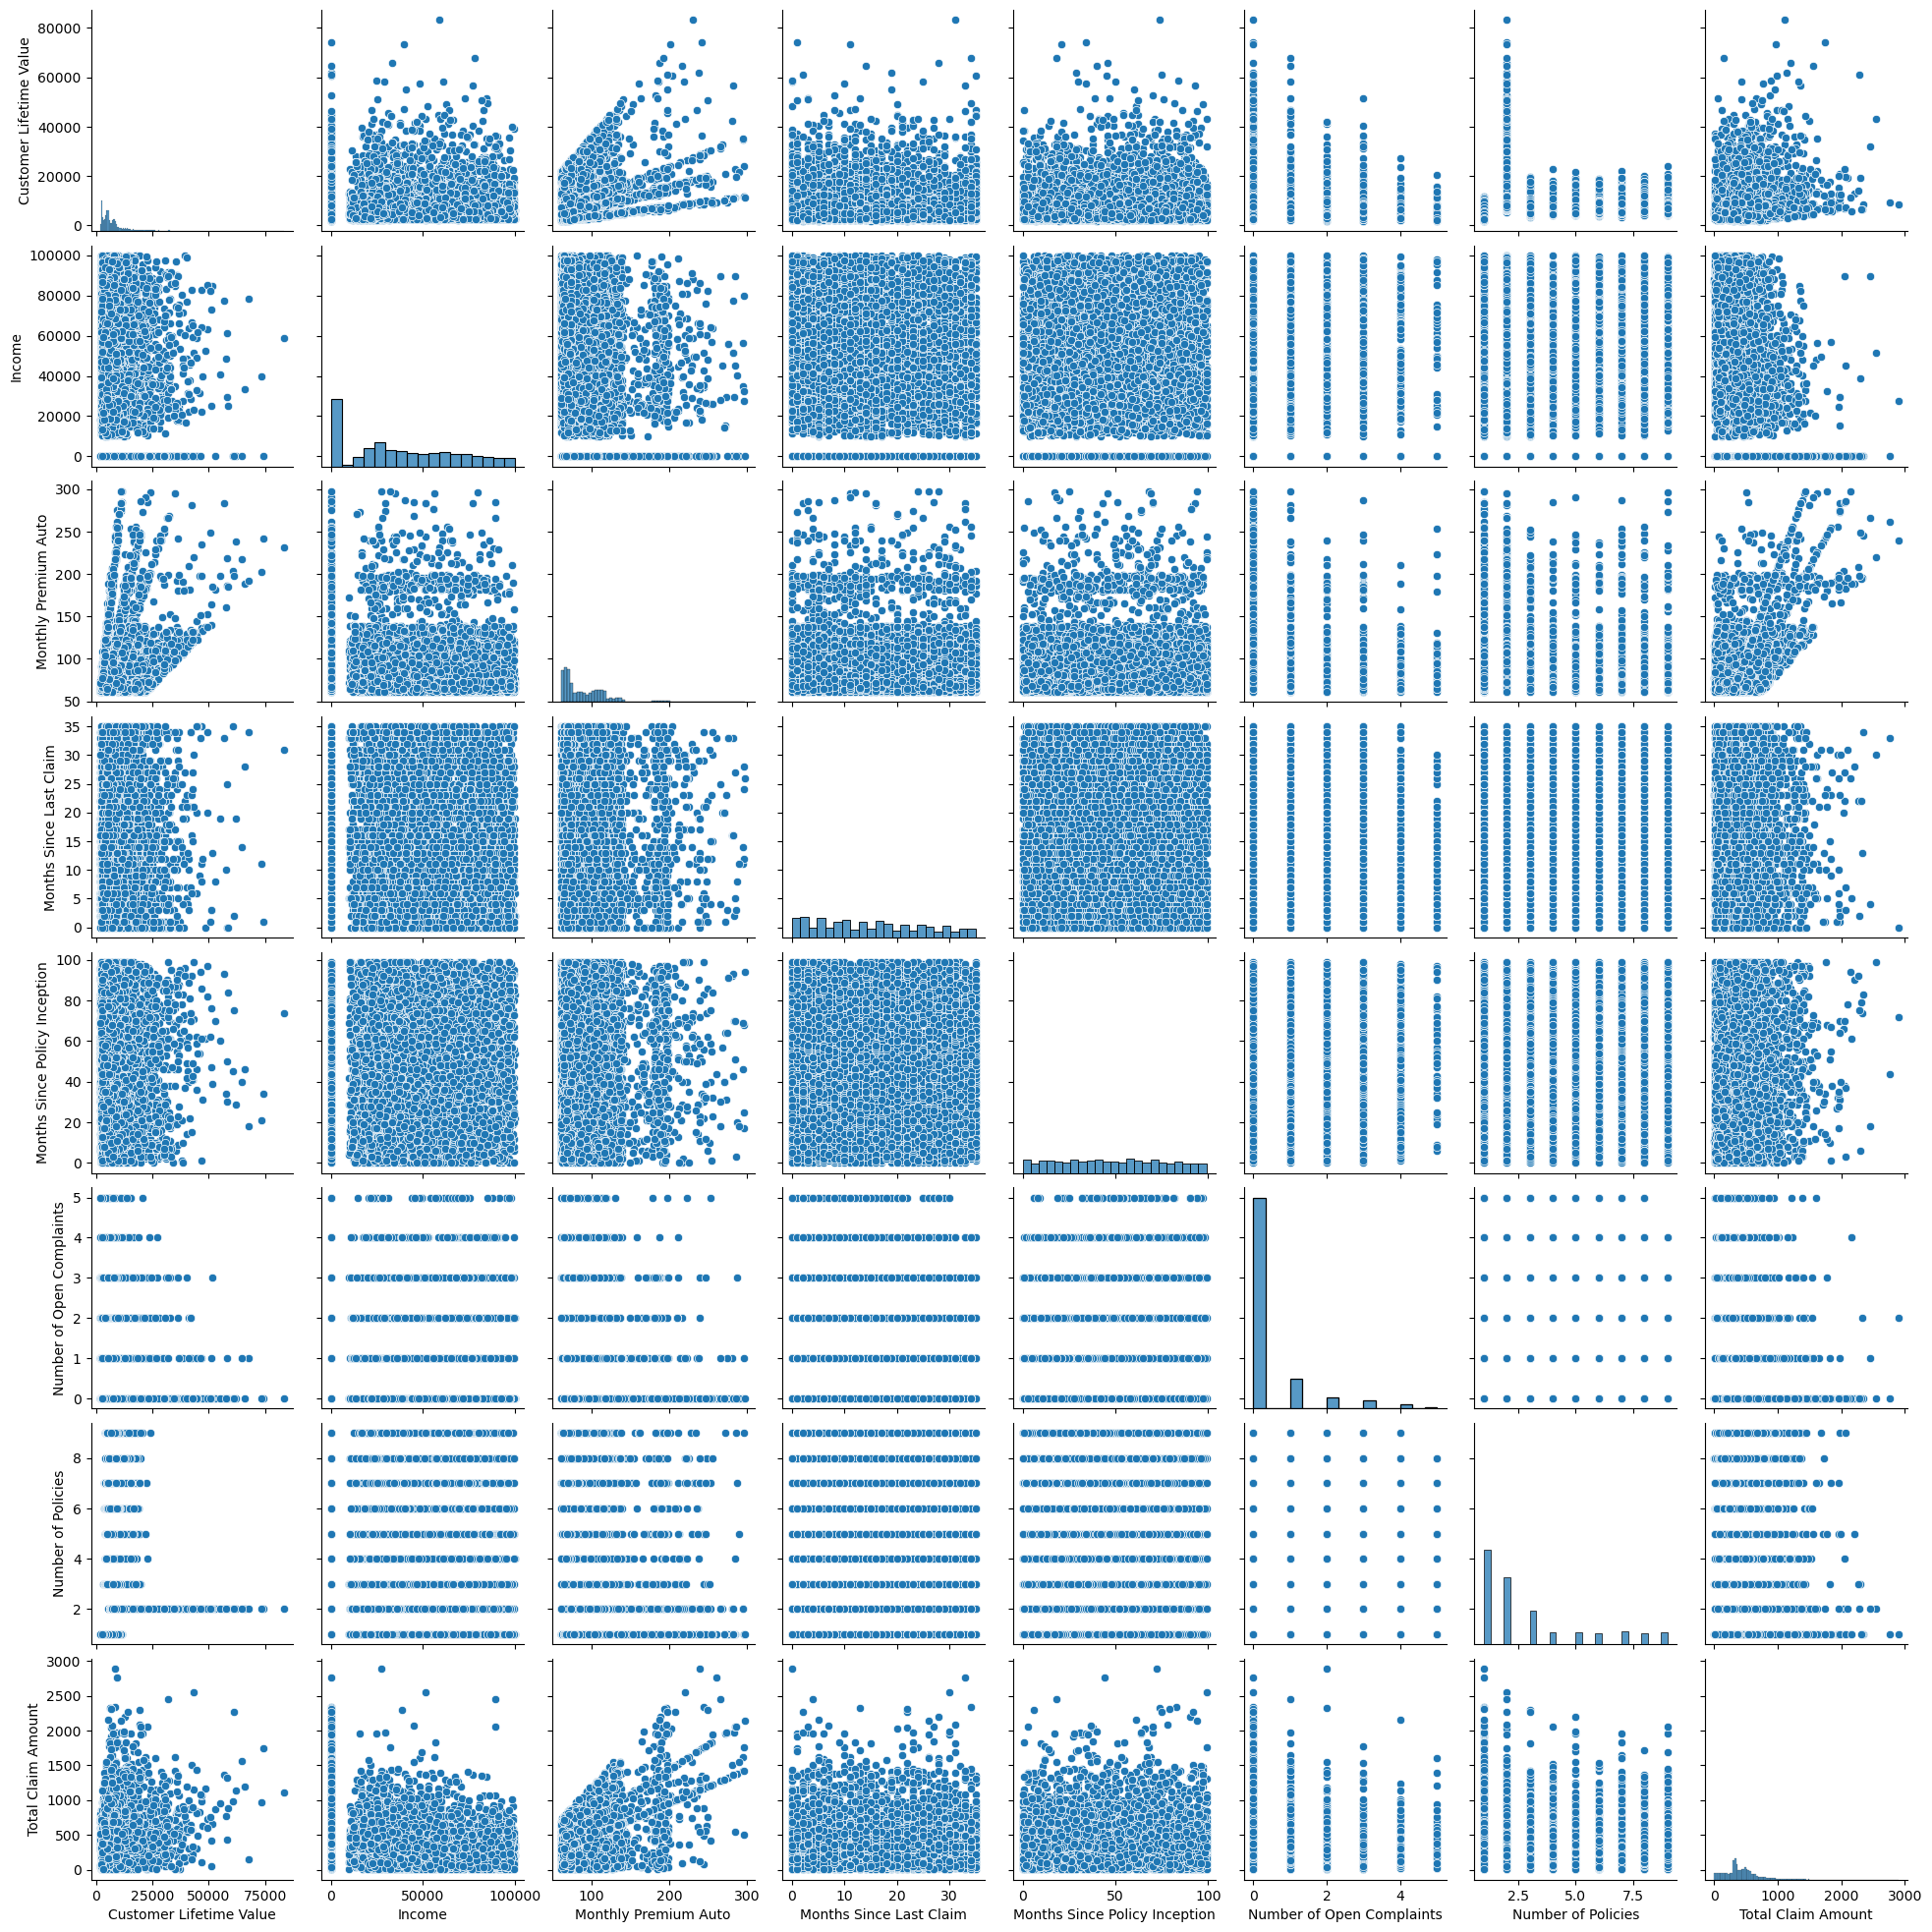

In [24]:
sns.pairplot(df)

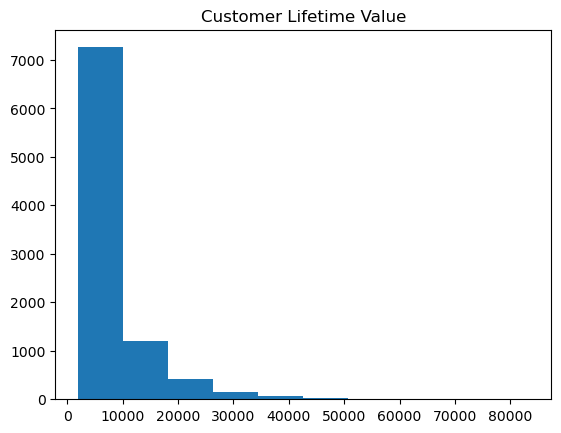

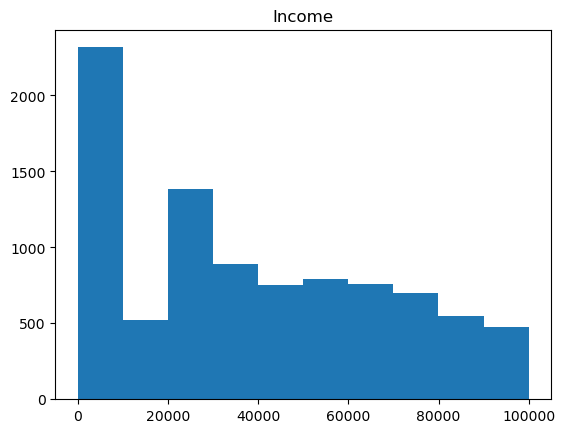

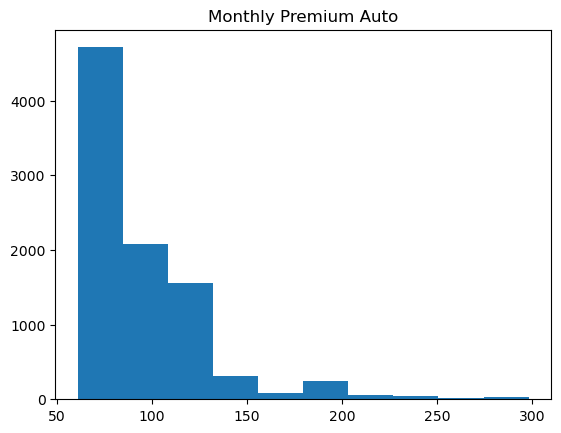

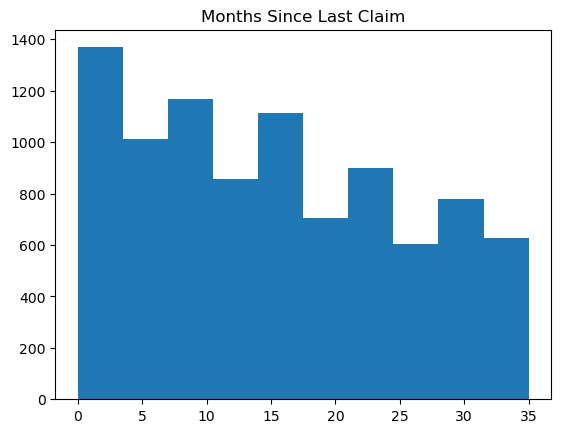

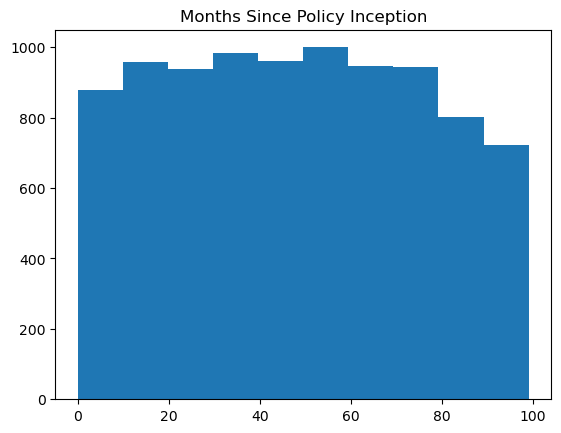

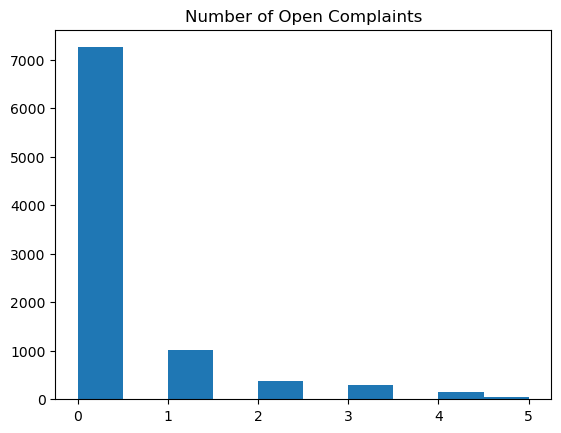

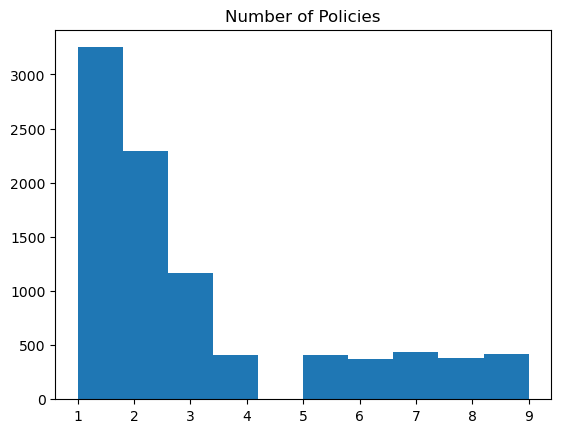

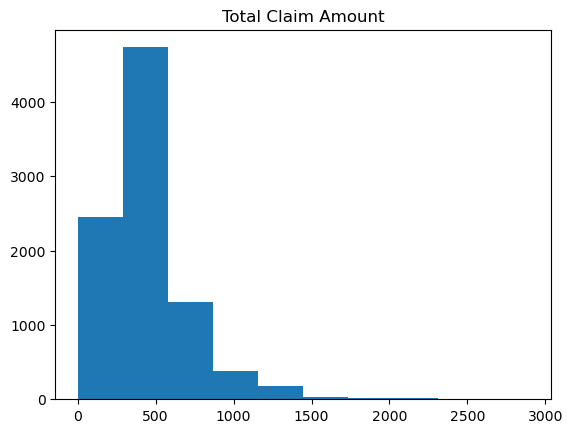

In [25]:
# Plot histograms for each of the numeric features 
def plot_numeric_hist(dataframe):
    num_feats = df.select_dtypes(include=["float", "int"]).columns
    for feature in num_feats:
        plt.hist(df[feature])
        plt.title(f"{feature}")
        plt.show()
        
plot_numeric_hist(df)

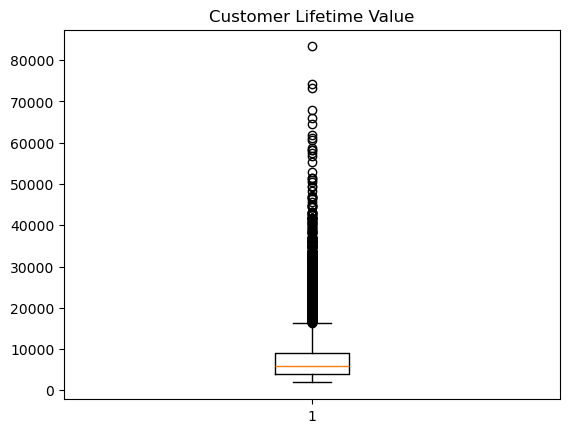

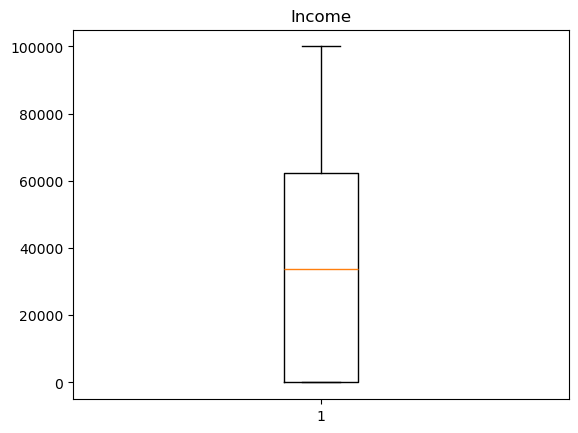

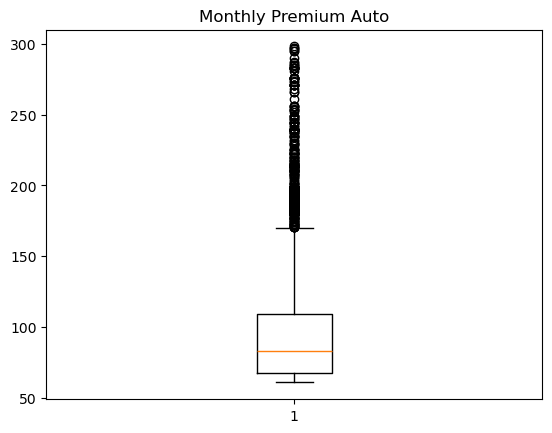

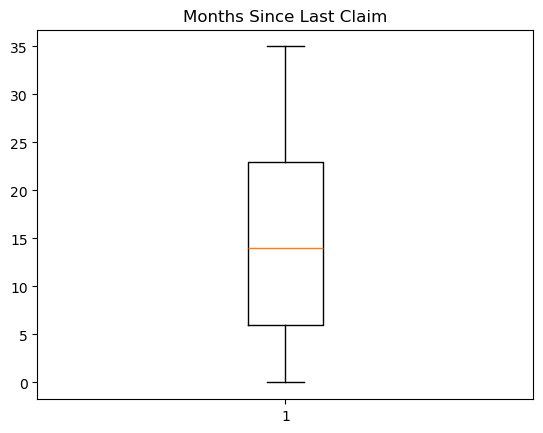

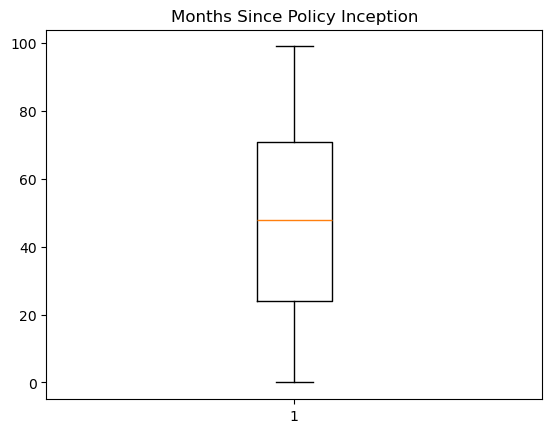

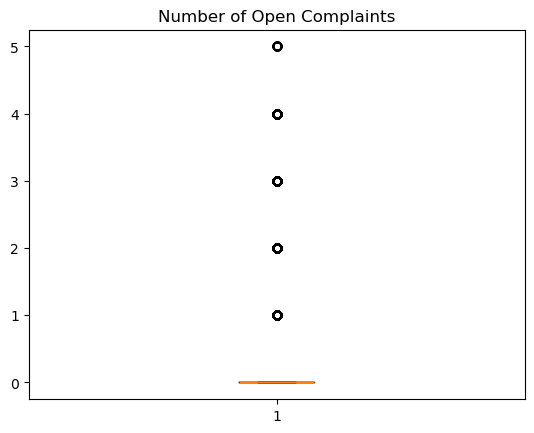

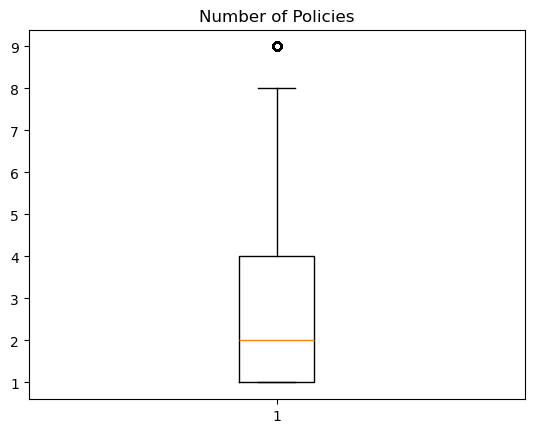

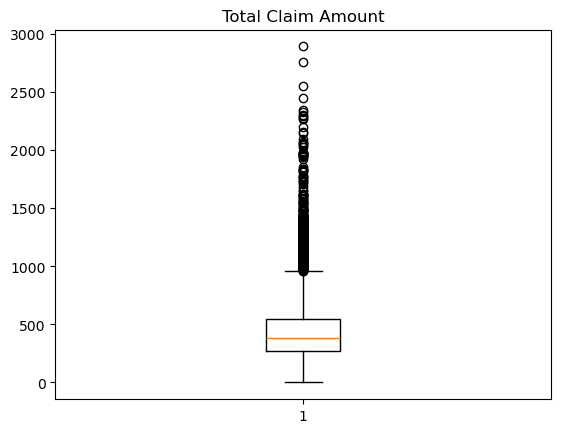

In [26]:
# Plot boxplots for each of the numeric features 
def plot_numeric_box(dataframe):
    num_feats = df.select_dtypes(include=["float", "int"]).columns
    for feature in num_feats:
        plt.boxplot(df[feature])
        plt.title(f"{feature}")
        plt.show()
        
plot_numeric_box(df)

In [27]:
# Check the correlations between numeric features
num_feats = df.select_dtypes(include=["float", "int"])
num_feats.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


As expected from insurance data, the data is right-skewed with extreme outliers. 

There is some correlation between CLV and Monthly Premium. This would indicate that it's worth exploring what the variables are that go into determining the Monthly Premium, and then targeting audiences that match those variables that lead to higher premiums. 

There is also correlation between Monthly Premium and Total Claim Amount, which shows that people who pay higher premiums claim more. This could either be due to them driving cars that are more expensive to fix, or they're risker drivers and experience more events that result in claims. 

Because these are opposing forces, it could be worth creating a feature that looks at CLV minus Total Claim Amount. This would show the relative profitability of a customer, taking into consideration both their revenue and their costs. 

What's strange, is that there is little correlation between CLV and Months Since Policy Inception. You'd imagine that people who have held policies for long would have higher CLV. It's likely that the CLV feature is predicted lifetime value, rather than actual. It might be useful to create a feature that reflects actual revenue per customer, and then another feature that reflects profit per customer. 

In [46]:
# Explore data for customer with 0 months since policy inception
df_0mth = df[df['Months Since Policy Inception'] < 1]

df_0mth.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,83.0,7302.156215,6135.710296,2413.139714,4360.649407,5318.89664,8623.633022,38320.82017
Income,83.0,44329.783133,25761.189539,0.000000,25134.000000,48992.00000,63866.500000,99816.00000
Monthly Premium Auto,83.0,92.650602,37.251758,62.000000,67.000000,74.00000,111.500000,226.00000
Months Since Last Claim,83.0,15.313253,9.751707,0.000000,5.500000,16.00000,23.000000,33.00000
Months Since Policy Inception,83.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
Number of Open Complaints,83.0,0.289157,0.690177,0.000000,0.000000,0.00000,0.000000,3.00000
Number of Policies,83.0,3.493976,2.724655,1.000000,1.000000,2.00000,6.000000,9.00000
Total Claim Amount,83.0,451.371462,247.042810,5.894778,298.694403,421.70554,618.703265,1084.80000


### Categorical features

In [38]:
# Create a function that shows info about the categorical features 
def cat_feats_details(dataframe):
    cat_feats = dataframe.select_dtypes(include=["object"]).columns
    cat_feats_info = pd.DataFrame(columns=["Feature", "Uniques", "Mode"])
    for feature in cat_feats:
        uniques = dataframe[feature].nunique()
        mode = dataframe[feature].mode()[0] if not dataframe[feature].mode().empty else None
        feat_row = pd.DataFrame([[feature, uniques, mode]], columns=["Feature", "Uniques", "Mode"])
        cat_feats_info = pd.concat([cat_feats_info, feat_row], ignore_index=True)
        
    return cat_feats_info

cat_feats_details(df)

,Feature,Uniques,Mode
0,Customer,9134,AA10041
1,State,5,California
2,Response,2,No
3,Coverage,3,Basic
4,Education,5,Bachelor
5,Effective To Date,59,1/10/11
6,EmploymentStatus,5,Employed
7,Gender,2,F
8,Location Code,3,Suburban
9,Marital Status,3,Married


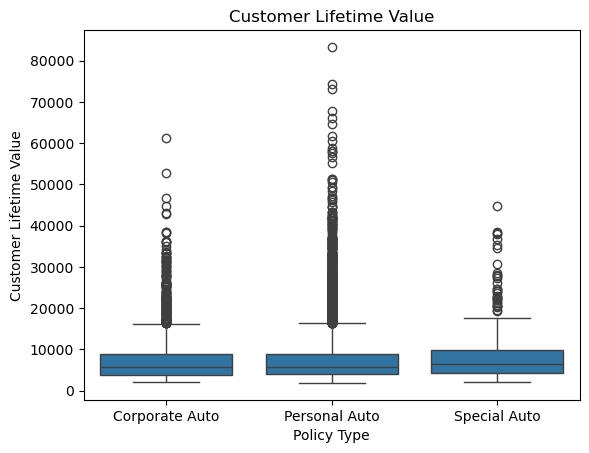

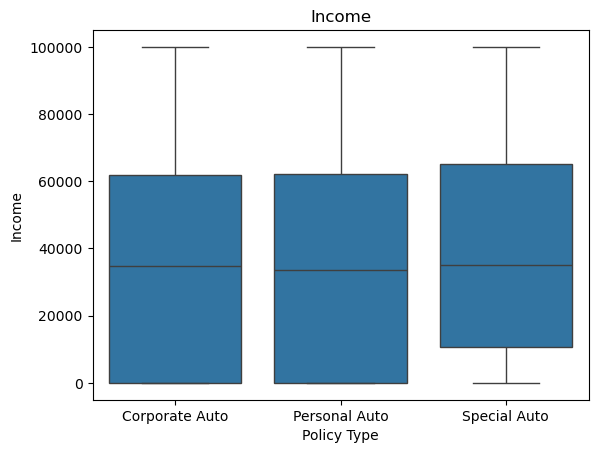

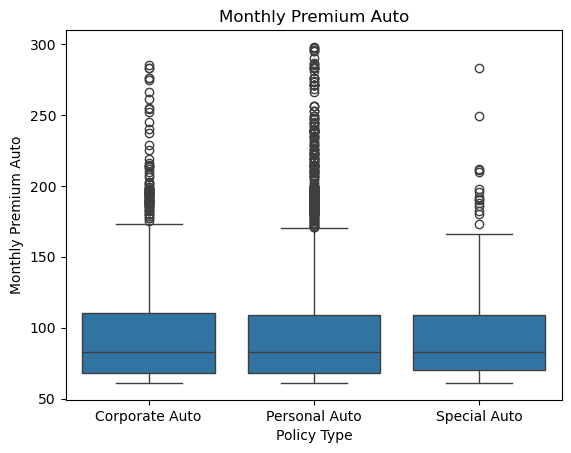

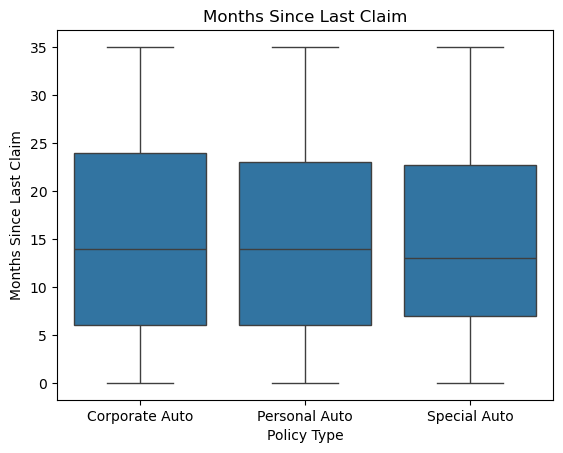

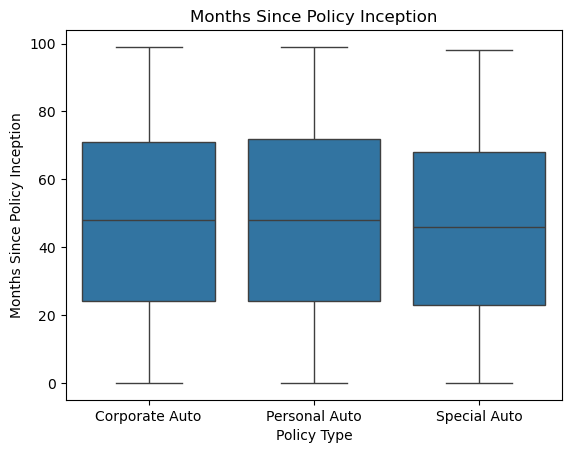

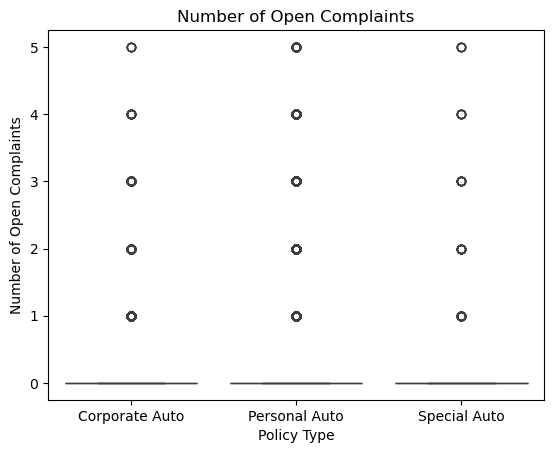

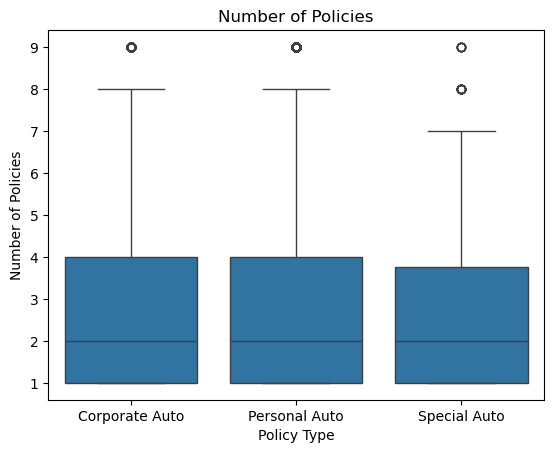

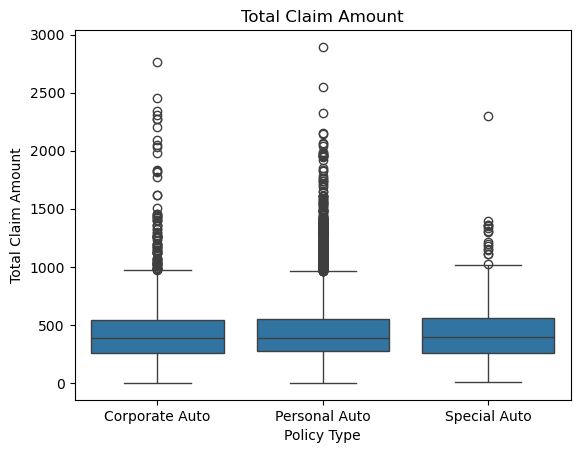

In [50]:
# Plot boxplots for each of the numeric features broken down by policy type
def plot_numeric_box(dataframe):
    num_feats = df.select_dtypes(include=["float", "int"]).columns
    for feature in num_feats:
        sns.boxplot(x='Policy Type', y=feature, data=dataframe)
        plt.title(feature)
        plt.xlabel("Policy Type")
        plt.show()
        
plot_numeric_box(df)

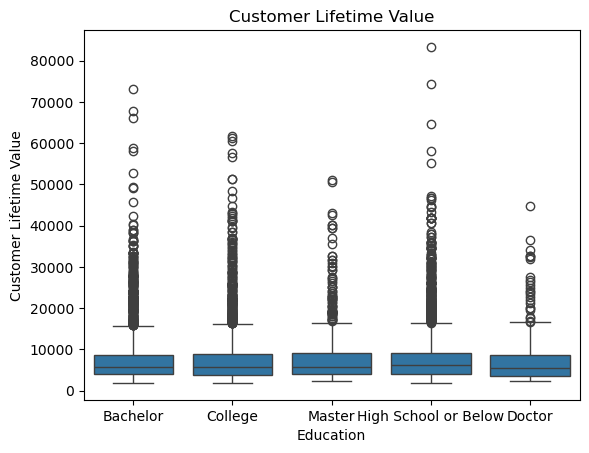

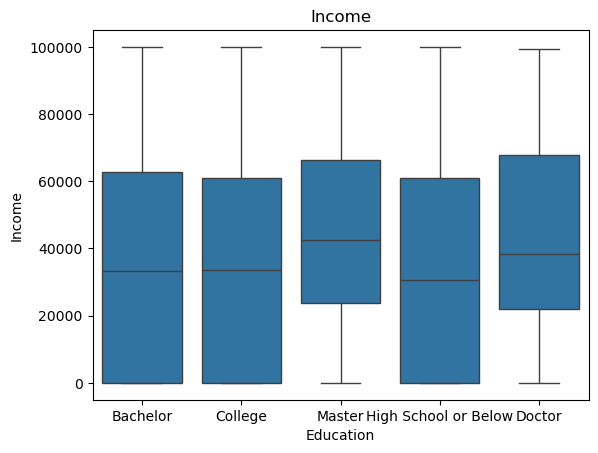

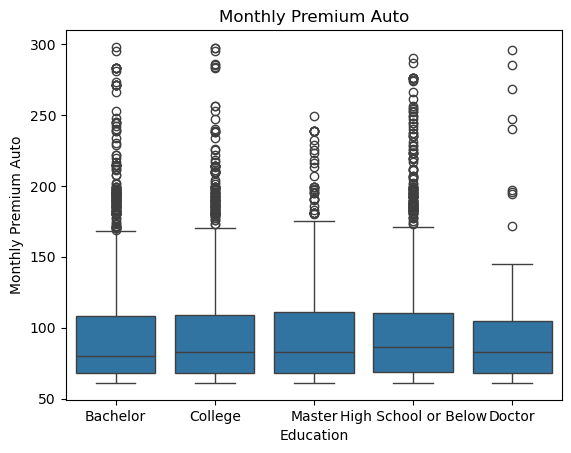

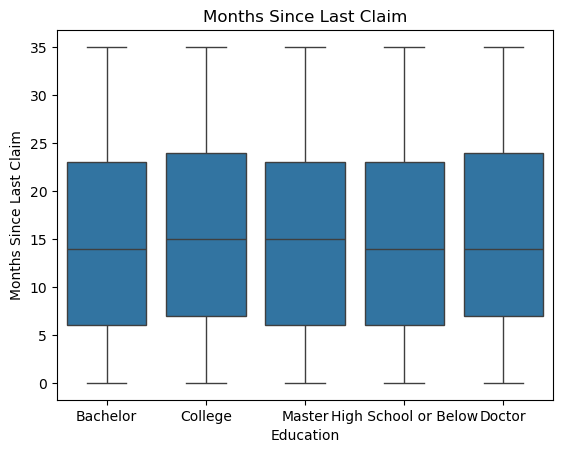

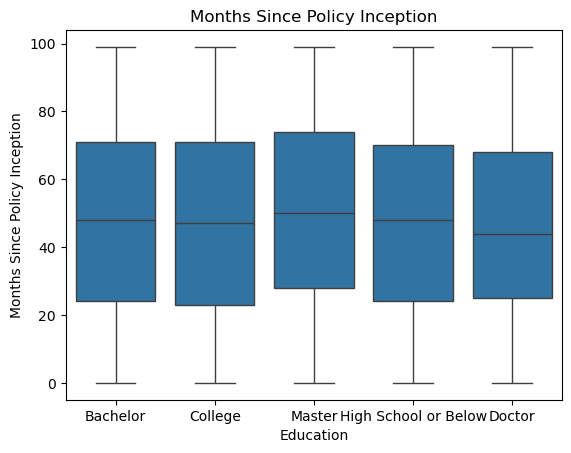

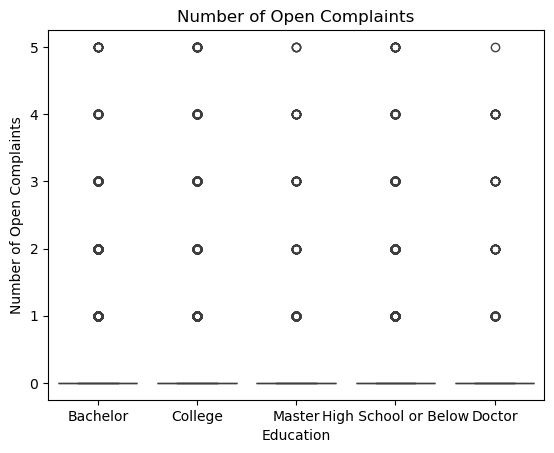

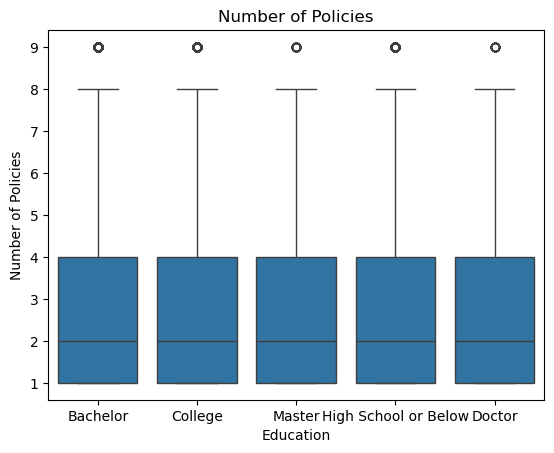

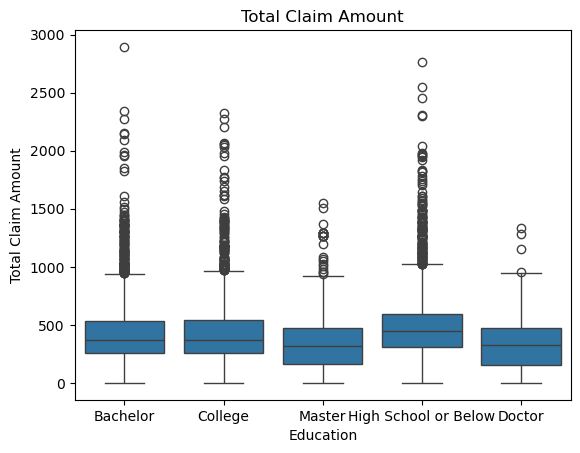

In [51]:
# Plot boxplots for each of the numeric features broken down by education
def plot_numeric_box(dataframe):
    num_feats = df.select_dtypes(include=["float", "int"]).columns
    for feature in num_feats:
        sns.boxplot(x='Education', y=feature, data=dataframe)
        plt.title(feature)
        plt.xlabel("Education")
        plt.show()
        
plot_numeric_box(df)

### Create Customer Lifetime Profit feature

In [ ]:
# Calculate revenue per customer 

# Create feature which is CLV less Total Claim Amount